In [1]:
%matplotlib inline

In [2]:
import json
import pandas
import stanutil
from IPython.display import display
import scipy
import seaborn
import matplotlib.pyplot as plt
import pickle

In [3]:
seaborn.reset_orig()
seaborn.set_context('talk')

In [4]:
df = pandas.read_csv('data.csv', index_col=0)
with open('names.json') as f:
    names = json.load(f)
display(df)

,difficulty,user/0000,user/0001,user/0002,user/0003,user/0004,user/0005,user/0006,user/0007,user/0008,...,user/0990,user/0991,user/0992,user/0993,user/0994,user/0995,user/0996,user/0997,user/0998,user/0999
1124,100,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1125,100,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1126,250,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1127,300,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1128,550,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1129,100,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1130,150,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1131,400,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1132,450,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1133,550,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
filename = 'stan_model_and_fit.pkl'
with open(filename, 'rb') as f:
    stan_model = pickle.load(f)
    fit = pickle.load(f)

In [6]:
pars = ['a0', 'b0', 'mu_pf', 'sigma_pf', 'gamma']
# pars = None
stanutil.stanfit_to_dataframe(fit, pars=pars)

,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
a0,1.401160,0.005004,0.165957,1.105114,1.284580,1.392457,1.505853,1.759673,1100.0,1.003004
b0,0.446854,0.001976,0.048534,0.355424,0.413220,0.444835,0.478531,0.546147,603.0,1.006031
mu_pf,0.454439,0.000272,0.011356,0.431776,0.447227,0.454152,0.461745,0.477968,1741.0,1.002219
sigma_pf,0.115852,0.000298,0.011378,0.095042,0.107760,0.115621,0.123538,0.139378,1456.0,1.001334
gamma,13.212735,0.004708,0.119208,12.905531,13.160651,13.256105,13.295631,13.349435,641.0,1.006960


In [7]:
x = pandas.DataFrame()
q = stanutil.MAP(fit, 'q')
x['name'] = names[:len(q)]
x['q'] = q
x['pf'] = scipy.array(stanutil.MAP(fit, 'pf'))
x

,name,q,pf
0,asi1024,0.966839,0.930219
1,tozangezan,0.815160,1.107315
2,satashun,0.755811,1.160213
3,lyrically,0.734738,1.271406
4,japlj,0.722051,1.268336
5,sigma425,0.788741,0.953478
6,dohatsu,0.999781,0.678349
7,namonakiaccount,0.850128,0.779023
8,kmcyuma,0.912084,0.674795
9,snuke,0.684462,0.931987


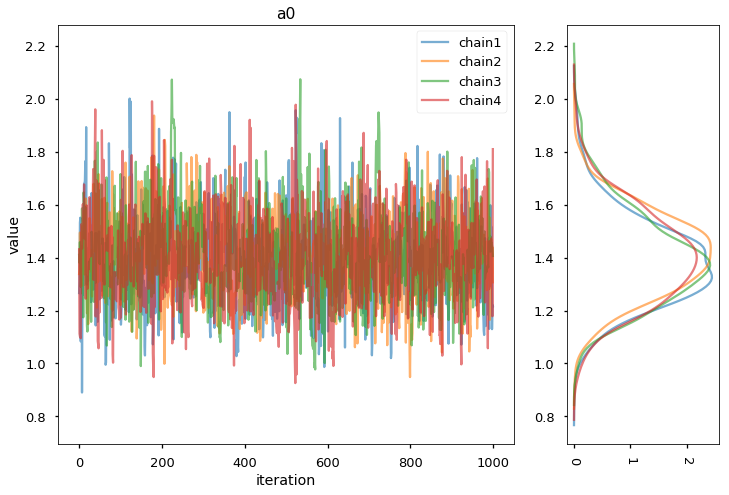

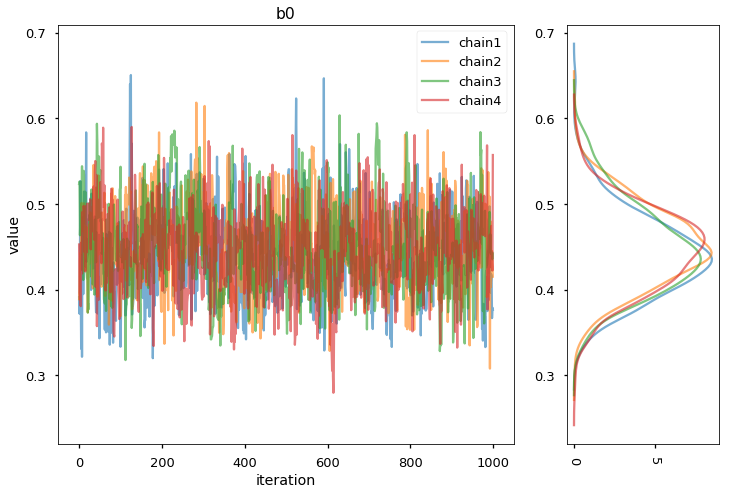

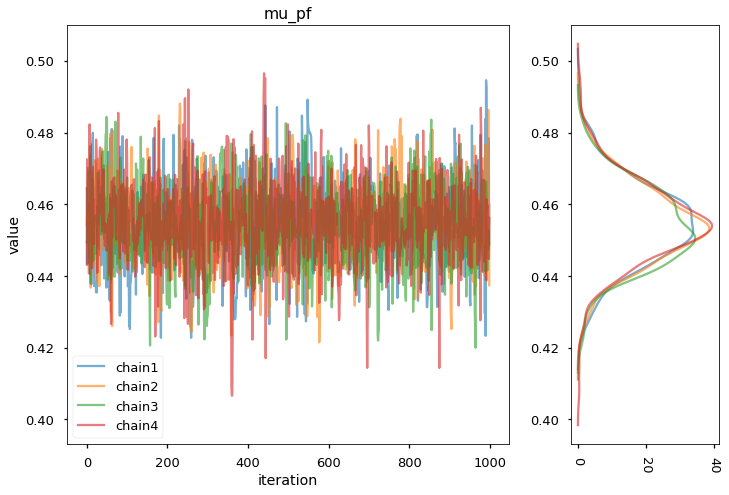

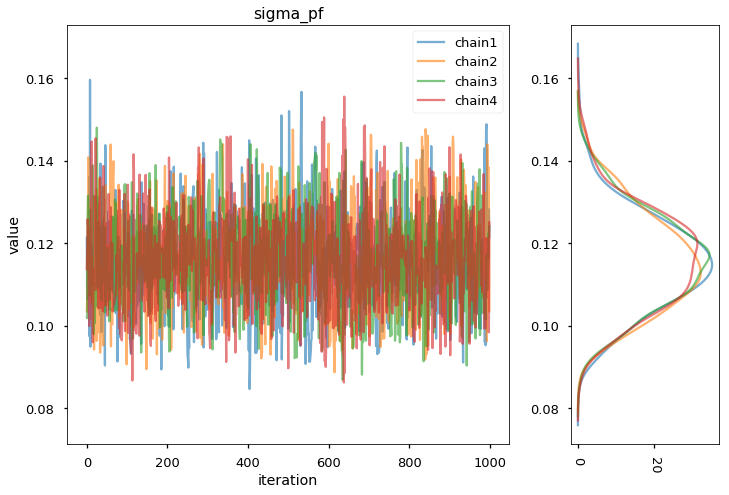

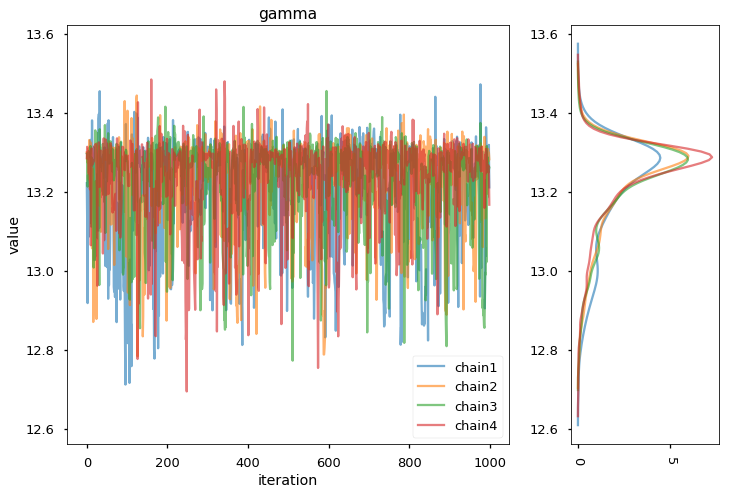

In [8]:
for par in ['a0', 'b0', 'mu_pf', 'sigma_pf', 'gamma']:
    stanutil.traceplot(fit, par)
    plt.show()

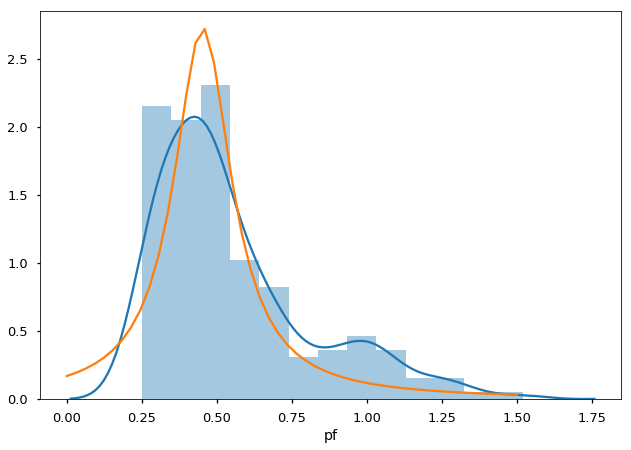

In [9]:
seaborn.distplot(x['pf'])
xs = scipy.linspace(0, 1.5)
mu_pf = stanutil.MAP(fit, 'mu_pf')
sigma_pf = stanutil.MAP(fit, 'sigma_pf')
ys = scipy.stats.cauchy.pdf(xs, loc=mu_pf, scale=sigma_pf)
plt.plot(xs, ys)
plt.show()

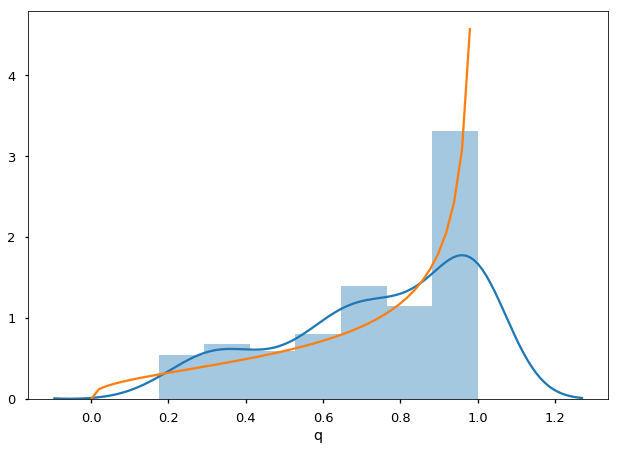

In [10]:
seaborn.distplot(x['q'])
xs = scipy.linspace(0, 1)
a0 = stanutil.MAP(fit, 'a0')
b0 = stanutil.MAP(fit, 'b0')
ys = scipy.stats.beta.pdf(xs, a=a0, b=b0)
plt.plot(xs, ys)
plt.show()

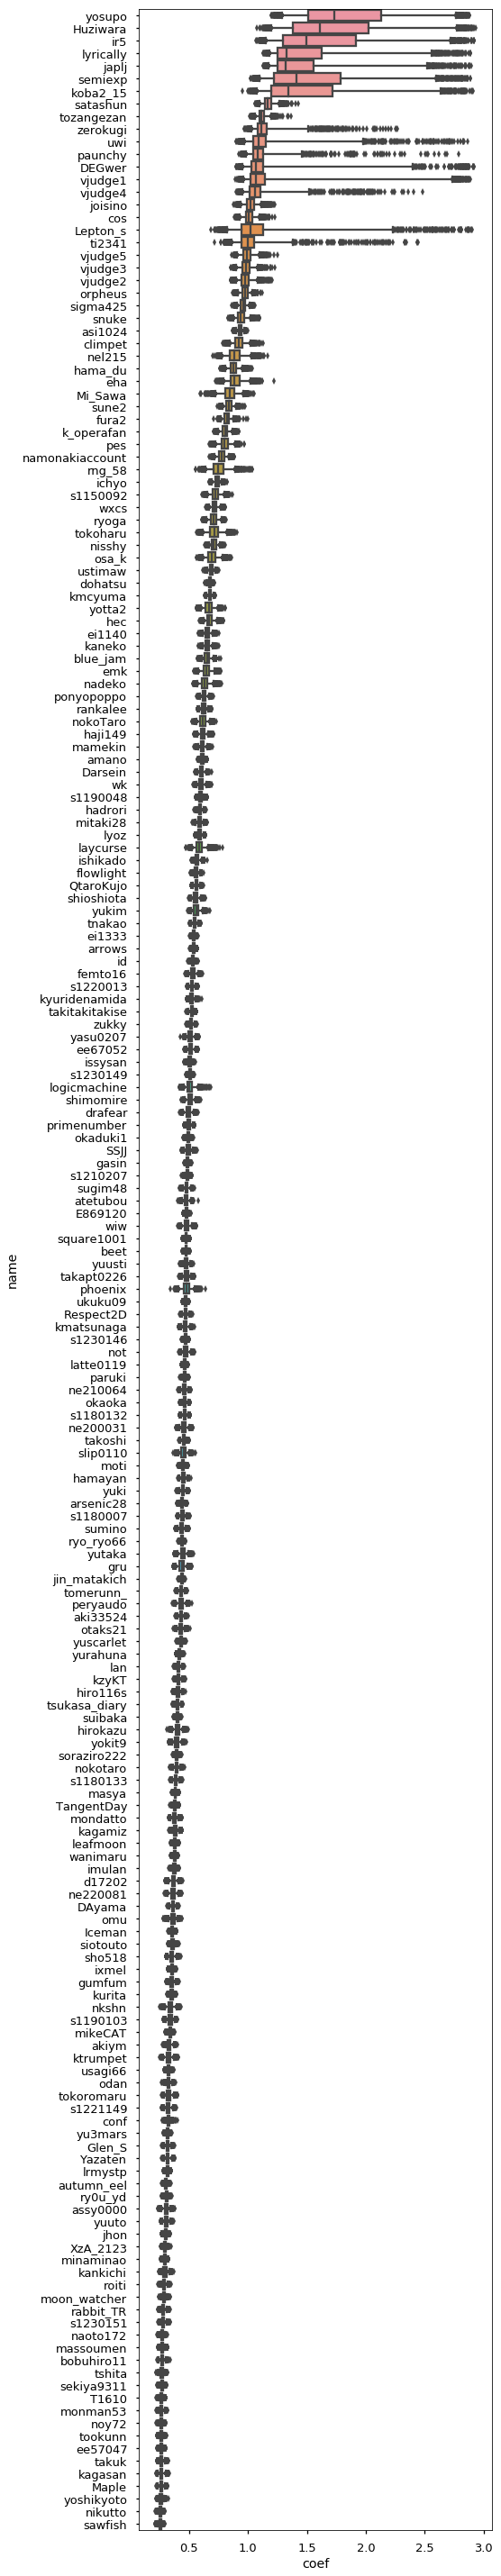

In [11]:
ms = fit.extract(pars=['pf'])
coef = pandas.DataFrame(ms['pf'])
dfm = []
order = []
for i, name in enumerate(names[:len(x)]):
    row = pandas.DataFrame()
    row['coef'] = coef.iloc[:,i]
    row['name'] = name
    dfm.append(row)
    order.append((name, x.iloc[i]['pf']))
dfm = pandas.concat(dfm)
order = list(map(lambda x: x[0], sorted(order, key=lambda x: x[1], reverse=True)))
plt.figure(figsize=(8, 40))
boxplot_whis = [2.5, 97.5]
seaborn.boxplot(x='coef', y='name', data=dfm, order=order, whis=boxplot_whis)
plt.tight_layout()
plt.savefig('performance.png')